# notebook to model on just key features for potential use in in input model only" #

In [9]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# import scaler and tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [10]:
# read the contents of a zip file
import zipfile
with zipfile.ZipFile("hrdata.zip","r") as zip_ref:
    zip_ref.extractall("datafiles")

In [11]:
# read the contents of a csv file
df = pd.read_csv(r"datafiles\HR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
# review the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
# drop the rows with null values
df_drop = df.dropna()
# df_drop.info()
df = df_drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   department             15000 non-null  object 
 9   salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [14]:
df = df.drop(['department', 'promotion_last_5years'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   salary                 15000 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [15]:
df_dummies = pd.get_dummies(df, columns=["salary"])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   salary_high            15000 non-null  uint8  
 8   salary_low             15000 non-null  uint8  
 9   salary_medium          15000 non-null  uint8  
 10  salary_nme             15000 non-null  uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 996.1 KB


In [16]:
# create and split the training and test sets
X = df_dummies.drop(['left'], axis=1)
y = df_dummies['left']
print("Shape: ", X.shape, y.shape)

Shape:  (15000, 10) (15000,)


### create the testing and training data ###

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear and Logicstic Regression on on Non Scaled Data ###

In [18]:
# create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.2130517463146201
Testing Data Score: 0.2015878347429807


In [20]:
# create the regresion model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [21]:
# fit the model
classifier.fit(X_train, y_train)

C:\Users\benjy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# print the scores
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7893333333333333
Testing Data Score: 0.791


In [23]:
# create a confusion matrix to demonstrate accuracy of logistic regression
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[2144,  154],
       [ 473,  229]], dtype=int64)

In [24]:
# show math behind accuracy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.791


In [25]:
# reporting on classifcation report performance
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2298
           1       0.60      0.33      0.42       702

    accuracy                           0.79      3000
   macro avg       0.71      0.63      0.65      3000
weighted avg       0.77      0.79      0.77      3000



#### Scaling the data ####

In [26]:
# scaling the X Data by using the standardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# create the linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
# print the scores
print(f"Scaled Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Scaled Training Data Score: 0.213030611104022
Scaled Testing Data Score: 0.20146172916512095


In [29]:
# create the logiistic regresion model with e scaled data
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
# print the scores
print(f"Scaled Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Scaled Training Data Score: 0.7854166666666667
Scaled Testing Data Score: 0.7853333333333333


### KNN on non scaled and scaled data ###

In [33]:
# create a KNN model using the  data
# import scaler and tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# import k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    print(f"K: {k}, Train: {train_score}, Test: {test_score}")

K: 1, Train: 1.0, Test: 0.9686666666666667
K: 3, Train: 0.9743333333333334, Test: 0.956
K: 5, Train: 0.9605833333333333, Test: 0.95
K: 7, Train: 0.9515, Test: 0.9523333333333334
K: 9, Train: 0.9483333333333334, Test: 0.9513333333333334
K: 11, Train: 0.9449166666666666, Test: 0.9476666666666667
K: 13, Train: 0.9436666666666667, Test: 0.9463333333333334
K: 15, Train: 0.9423333333333334, Test: 0.945
K: 17, Train: 0.9406666666666667, Test: 0.9446666666666667
K: 19, Train: 0.9388333333333333, Test: 0.9416666666666667


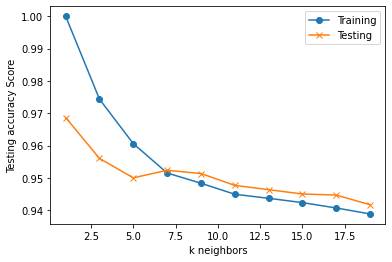

In [35]:
# plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(["Training", "Testing"])
plt.show()

In [36]:
# Use KNN model on the scaled data
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
scaled_train_scores = []
scaled_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scaled_train_score = knn.score(X_train_scaled, y_train)
    scaled_test_score = knn.score(X_test_scaled, y_test)
    scaled_train_scores.append(knn.score(X_train_scaled, y_train))
    scaled_test_scores.append(knn.score(X_test_scaled, y_test))
    print(f"K: {k}, Scaled Train: {scaled_train_score}, Scaled Test: {scaled_test_score}")

K: 1, Scaled Train: 1.0, Scaled Test: 0.9806666666666667
K: 3, Scaled Train: 0.9824166666666667, Scaled Test: 0.968
K: 5, Scaled Train: 0.9725833333333334, Scaled Test: 0.9626666666666667
K: 7, Scaled Train: 0.969, Scaled Test: 0.965
K: 9, Scaled Train: 0.9661666666666666, Scaled Test: 0.963
K: 11, Scaled Train: 0.9646666666666667, Scaled Test: 0.963
K: 13, Scaled Train: 0.9636666666666667, Scaled Test: 0.962
K: 15, Scaled Train: 0.9618333333333333, Scaled Test: 0.9603333333333334
K: 17, Scaled Train: 0.9600833333333333, Scaled Test: 0.9593333333333334
K: 19, Scaled Train: 0.959, Scaled Test: 0.958


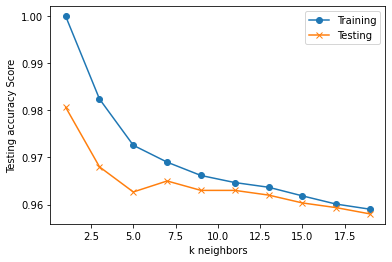

In [37]:
# plot the scaled results
plt.plot(range(1, 20, 2), scaled_train_scores, marker='o')
plt.plot(range(1, 20, 2), scaled_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(["Training", "Testing"])
plt.show()

In [43]:
# use a decision tree model to predict the data
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# print the scores
print(f"Training Data Score: {dtc.score(X_train, y_train)}")
print(f"Testing Data Score: {dtc.score(X_test, y_test)}")



Training Data Score: 1.0
Testing Data Score: 0.9786666666666667


In [44]:
# use a decision tree model to predict the data with scaled data
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
# print the scores
print(f"Scaled Training Data Score: {dtc.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {dtc.score(X_test_scaled, y_test)}")



Scaled Training Data Score: 1.0
Scaled Testing Data Score: 0.979


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
# print the scores
print(f"Training Data Score: {rfc.score(X_train, y_train)}")
print(f"Testing Data Score: {rfc.score(X_test, y_test)}")



Training Data Score: 0.9999166666666667
Testing Data Score: 0.9896666666666667


In [48]:
rfc = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
# print the scores
print(f"Scaled Training Data Score: {rfc.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {rfc.score(X_test_scaled, y_test)}")

Scaled Training Data Score: 0.9999166666666667
Scaled Testing Data Score: 0.99
